<a href="https://colab.research.google.com/github/astrasart/art/blob/main/diffuser_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries (run this once if not already installed)
!pip install diffusers transformers torch accelerate pyngrok -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.1 MB/s eta 0:00:00


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Enter your image prompt (e.g., 'A futuristic cityscape at night'): A photrealistic city at night with the sun setting and vibrant lights


  0%|          | 0/50 [00:00<?, ?it/s]


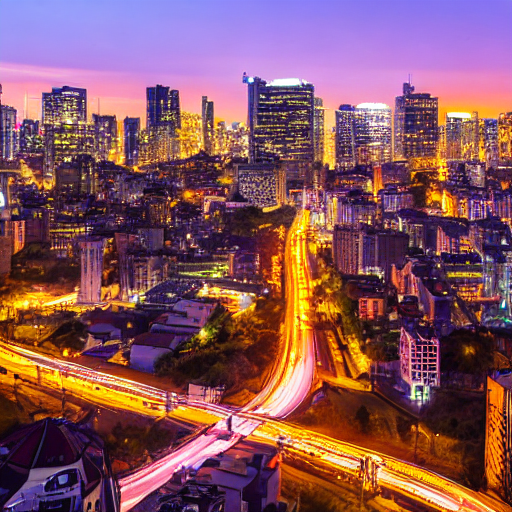
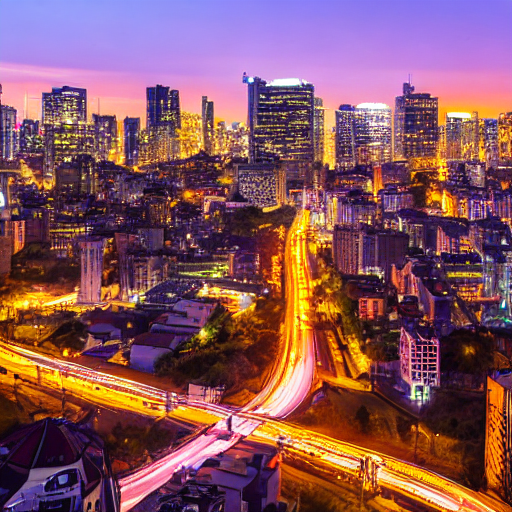

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Image generated and saved as 'generated_image.png'
HTML file created as 'generated_image.html' and displayed below
Click the 'Download Image' button to save the image to your Downloads folder


In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import base64
from io import BytesIO
from IPython.display import display, HTML
from google.colab import files

# Load the model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Define the negative prompt
negative_prompt = (
    "Blurry, low quality, distorted, pixelated, low resolution, artifacts, "
    "compression noise, washed out colors, overexposed, underexposed, "
    "unrealistic lighting, unnatural reflections, jagged edges, aliasing, "
    "chromatic aberration, out of focus, poor depth of field, oversaturated, "
    "desaturated, unnatural shadows, unrealistic fabric texture, flat shading, "
    "low detail, lack of sharpness, warped structure, unrealistic motion blur, "
    "artificial appearance, messy details, deformed flag, asymmetry, poor composition"
)

# Get prompt from user
prompt = input("Enter your image prompt (e.g., 'A futuristic cityscape at night'): ")

try:
    # Generate image
    image = pipe(
        prompt=prompt,
        num_inference_steps=50,
        guidance_scale=7.5,
        height=512,
        width=512,
        eta=0.0,
        negative_prompt=negative_prompt,
        seed=None  # Random seed, remove or set a number for consistent results
    ).images[0]

    # Convert image to base64 for HTML embedding
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")

    # Create HTML content with embedded image and download button
    html_content = f"""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <title>Generated Image</title>
        <style>
            body {{ font-family: Arial, sans-serif; text-align: center; background: #f0f0f0; }}
            h1 {{ color: #333; }}
            img {{ max-width: 100%; height: auto; margin-top: 20px; }}
            button {{
                margin-top: 20px;
                padding: 10px 20px;
                font-size: 16px;
                background-color: #4CAF50;
                color: white;
                border: none;
                cursor: pointer;
            }}
            button:hover {{ background-color: #45a049; }}
        </style>
    </head>
    <body>
        <h1>Generated Image</h1>
        <p>Prompt: "{prompt}"</p>
        <img src="data:image/png;base64,{img_str}" alt="Generated Image">
        <br>
        <button onclick="downloadImage()">Download Image</button>
        <script>
            function downloadImage() {{
                var link = document.createElement('a');
                link.href = 'data:image/png;base64,{img_str}';
                link.download = 'generated_image.png';
                document.body.appendChild(link);
                link.click();
                document.body.removeChild(link);
            }}
        </script>
    </body>
    </html>
    """

    # Save HTML file
    with open("generated_image.html", "w") as f:
        f.write(html_content)

    # Save the image separately
    image.save("generated_image.png")

    # Display the image inline in Colab with the download button
    display(HTML(html_content))

    # Provide download link for the HTML file
    print("Downloading the HTML file to your local machine...")
    files.download("generated_image.html")

    print("Image generated and saved as 'generated_image.png'")
    print("HTML file created as 'generated_image.html' and displayed below")
    print("Click the 'Download Image' button to save the image to your Downloads folder")

except Exception as e:
    print(f"Error generating image: {str(e)}")